# Cross Validation
The linear model is not just to be "straight line", but a more generalized concept by doing feature mapping. If all the weighted features are summed together without any operations such as divide, time or some more advanced signs (e.g. exponential, sin, cos), we can defined these problems are all linear and we can use the technique of linear regression to solve them.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import cross_val_score,validation_curve
from sklearn.pipeline import Pipeline

### Overfitting  and Underfitting 
In this section, we will understand what is **overfitting (variance)** and **underfitting (bias)**.

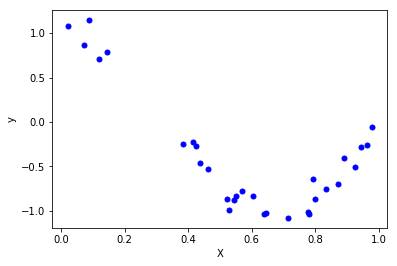

In [3]:
np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5*np.pi*X) + np.random.randn(n_samples) * 0.1

plt.plot(X,y,'b.',markersize=10)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

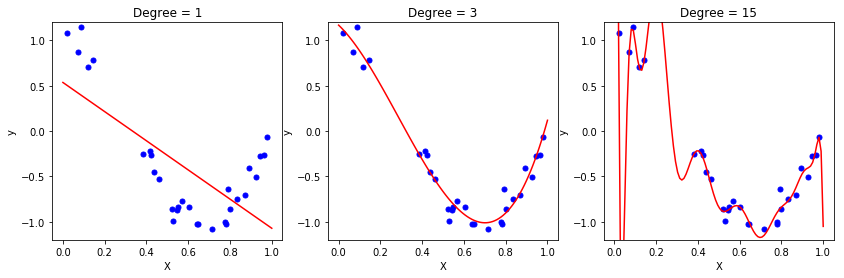

In [4]:
X_test = np.linspace(0, 1, 100)

degrees = np.array([1,3,15])
plt.figure(figsize=(14,4))
for i in np.arange(3):
    pipeline = Pipeline([('polynomial_features',PolynomialFeatures(degree=degrees[i],include_bias=False)),
                         ('standard_scale',StandardScaler()),
                         ('linear_regression',LinearRegression())])
    pipeline.fit(X[:,np.newaxis],y)
    
    plt.subplot(1,3,i+1)
    plt.title('Degree = {}'.format(degrees[i]))
    plt.plot(X,y,'b.',markersize=10)
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),'r-')
    plt.xlabel('X')
    plt.ylabel('y') 
    plt.ylim([-1.2,1.2])
plt.show()

**overfitting**
+ too many features - selecting a subse of fearures or dimension reduction (such as PCA)
+ small penalty (lambda) - increasing lambda

**underfitting**
+ too few features - using more fearures (e.g. polynomial features)
+ large penalty (lambda) - decreasing lambda

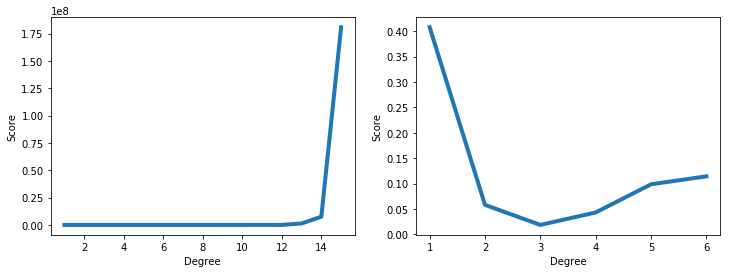

In [5]:
degrees = np.arange(1,16,1)
n_degree = degrees.size

scores = np.zeros(n_degree)
for i in degrees:
    pipeline = Pipeline([('polynomial_features',PolynomialFeatures(degree=i,include_bias=False)),
                         ('standard_scale',StandardScaler()),
                         ('linear_regression',LinearRegression())])
    #
    score_cv = cross_val_score(pipeline,X[:,np.newaxis],y,cv=10,scoring="neg_mean_squared_error")
    scores[i-1] = -np.mean(score_cv)
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(degrees,scores,'-',linewidth=4)
plt.xlabel('Degree')
plt.ylabel('Score')
plt.subplot(1,2,2)
plt.plot(degrees[0:6],scores[0:6],'-',linewidth=4)
plt.xlabel('Degree')
plt.ylabel('Score')
plt.show()

## Validation Curve

How do we determine the optimal *hyper-parameter*?

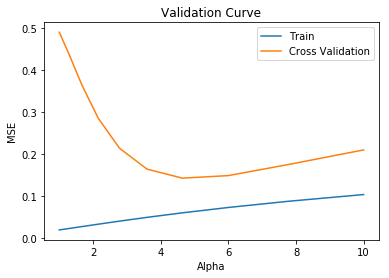

In [8]:
polynomial_features = PolynomialFeatures(degree=100,include_bias=False)
X_poly = polynomial_features.fit_transform(X[:,np.newaxis])

standard_scaler = StandardScaler()
X_poly = standard_scaler.fit_transform(X_poly)

alpha_range = np.logspace(0, 1,10)
train_scores, valid_scores = validation_curve(Ridge(), X_poly, y, "alpha",alpha_range,cv=10,scoring='neg_mean_squared_error')
train_scores = -train_scores.mean(axis=1)
valid_scores = -valid_scores.mean(axis=1)

plt.figure()
plt.plot(alpha_range,train_scores,label='Train')
plt.plot(alpha_range,valid_scores,label='Cross Validation')
plt.legend()
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

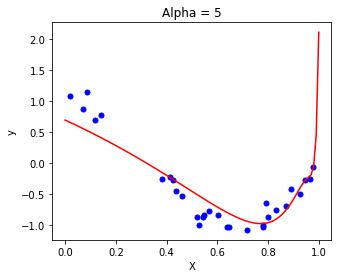

In [10]:
alpha_value = 5
linear_regression = Ridge(alpha=alpha_value)
linear_regression.fit(X_poly,y)

X_test_poly = polynomial_features.transform(X_test[:,np.newaxis])
X_test_poly = standard_scaler.transform(X_test_poly)

plt.figure(figsize=(5,4))
plt.title('Alpha = {}'.format(alpha_value))
plt.plot(X,y,'b.',markersize=10)
plt.plot(X_test,linear_regression.predict(X_test_poly),'r-')
plt.xlabel('X')
plt.ylabel('y')    
plt.show()